## About Project
In this project we will predict fraudulent activity in credit card transactions with the help of Machine learning Anomaly Detection Using Pycaret.


## About Data
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## Scope & Objective
   For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
   
   In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.


## Business Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models. In this project, we will analyse customer-level data that has been collected and analyzed during a research collaboration of World line and the Machine Learning Group.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.


## Data dictionary
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labeling, and it takes the value of 1 in cases of fraud and 0 in others.

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

#### 2.Importing the table

In [7]:
df=pd.read_csv("creditcard.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#### 3.Describing data

In [8]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.33

In [9]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
1%       2422.000000 -6.563199e+00 -4.960300e+00 -3.978377e+00 -3.122987e+00   
2%       5964.120000 -4.757888e+00 -3.419452e+00 -3.192457e+00 -2.742465e+00   
3%      11490.180000 -3.864514e+00 -2.677873e+00 -2.809154e+00 -2.528801e+00   
4%      19880.720000 -3.298547e+00 -2.236980e+00 -2.572682e+00 -2.362446e+00   
5%      25297.600000 -2.899147e+00 -1.971975e+00 -2.389740e+00 -2.195683e+00   
6%      28426.360000 -2.604921e+00 -1.787717e+00 -2.232574e+00 -2.041926e+00   
7%      30660.840000 -2.381382e+00 -1.649294e+00 -2.098802e+00 -1.913953e+00   
8%      32432.000000 -2

#### 4.Checking for Null data and duplicates and removing them

In [10]:
print(df.isnull().any())

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [11]:
print(df.duplicated().any())
print(df[df.duplicated()])

True
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        

###### There are some duplicates present in this Dataset

##### 4.1 In this we have 1081 duplicate data so we are removing it

In [12]:
print(f"Duplicated {len(df[df.duplicated()])} rows on idx: {list(df[df.duplicated()].index)}")

Duplicated 1081 rows on idx: [33, 35, 113, 114, 115, 221, 223, 1178, 1180, 1382, 1384, 1684, 1686, 2004, 2005, 2006, 2728, 2729, 2731, 2732, 2734, 2735, 2784, 2786, 2998, 3000, 3175, 3177, 3316, 3318, 3321, 3323, 4900, 4902, 5925, 5927, 6411, 6412, 6413, 9027, 9028, 9029, 11132, 11134, 12393, 12394, 12395, 13563, 13564, 13565, 13882, 13883, 13884, 16391, 16393, 17949, 17950, 17951, 18051, 18052, 18053, 18263, 18265, 19617, 19619, 19636, 19638, 19797, 19799, 20418, 20420, 21252, 21254, 21403, 21405, 21676, 21677, 21678, 21683, 21684, 21685, 21966, 21967, 21968, 22476, 22478, 22789, 22791, 23891, 23892, 23893, 24965, 24967, 24992, 24994, 25460, 25461, 25462, 25692, 25694, 26943, 26944, 26946, 26947, 26949, 26950, 27402, 27404, 27776, 27777, 27778, 28543, 28544, 28546, 28547, 28549, 28550, 28644, 28646, 29595, 29597, 30136, 30138, 30671, 30673, 30680, 30682, 31637, 31639, 31848, 31850, 31854, 31856, 31983, 31985, 32955, 32957, 34893, 34929, 34931, 35905, 35907, 36011, 36013, 36209, 36210,

In [13]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

In [14]:
print(f"Rows, Cols - After: {df.shape[0], df.shape[1]}")

Rows, Cols - After: (283726, 31)


#### Outliers treatment
As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available

## Visualizeing and Analysing the Data

#### 1.Fraudulent and Non Fraudulent activitys

In [15]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


#### 2.Visualizeing Count of Fraudulent and Non Fraudulent activitys preasent in transaction

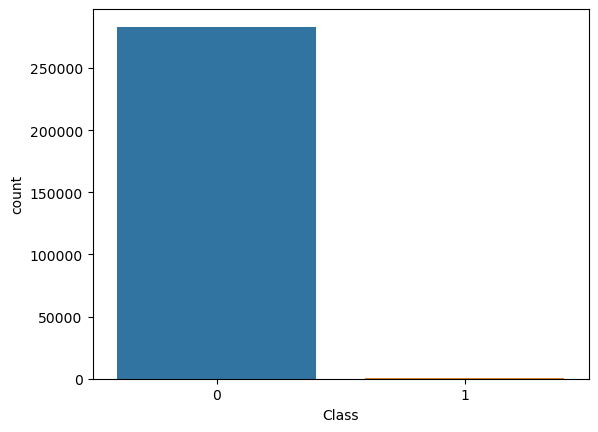

In [16]:
sns.countplot(data=df,x="Class")
plt.show()

##### 3.Created a scatter plot to observe the distribution of classes with time

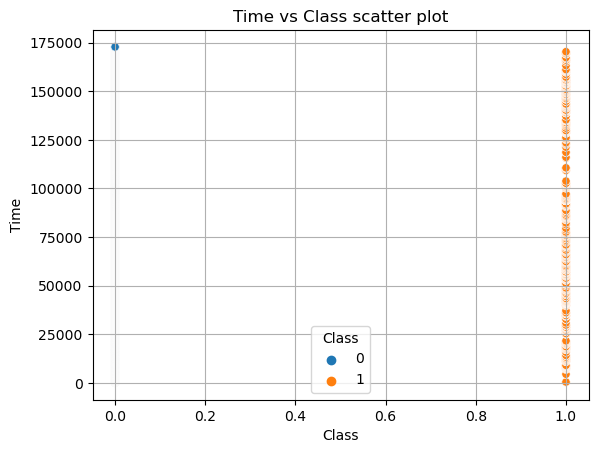

In [17]:
sns.scatterplot( df["Class"],df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()
plt.show()

#### 4.Create a scatter plot to observe the distribution of classes with Amount

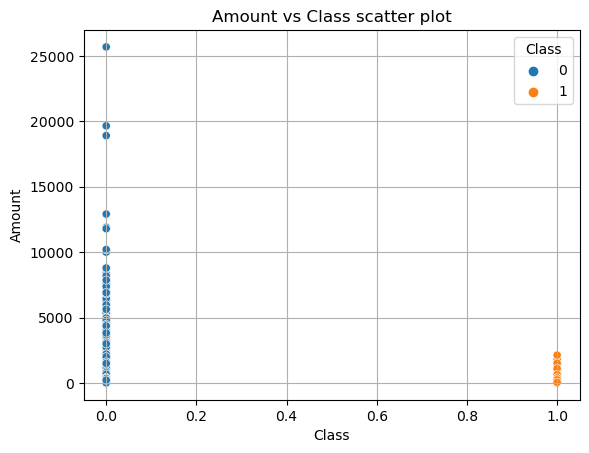

In [18]:
sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

##### Observation
Clearly low amount transactions are more likely to be fraudulent than high amount transaction

In [19]:
corr=df.corr()
print(corr)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

#### 5.Plotting the correlation matrix

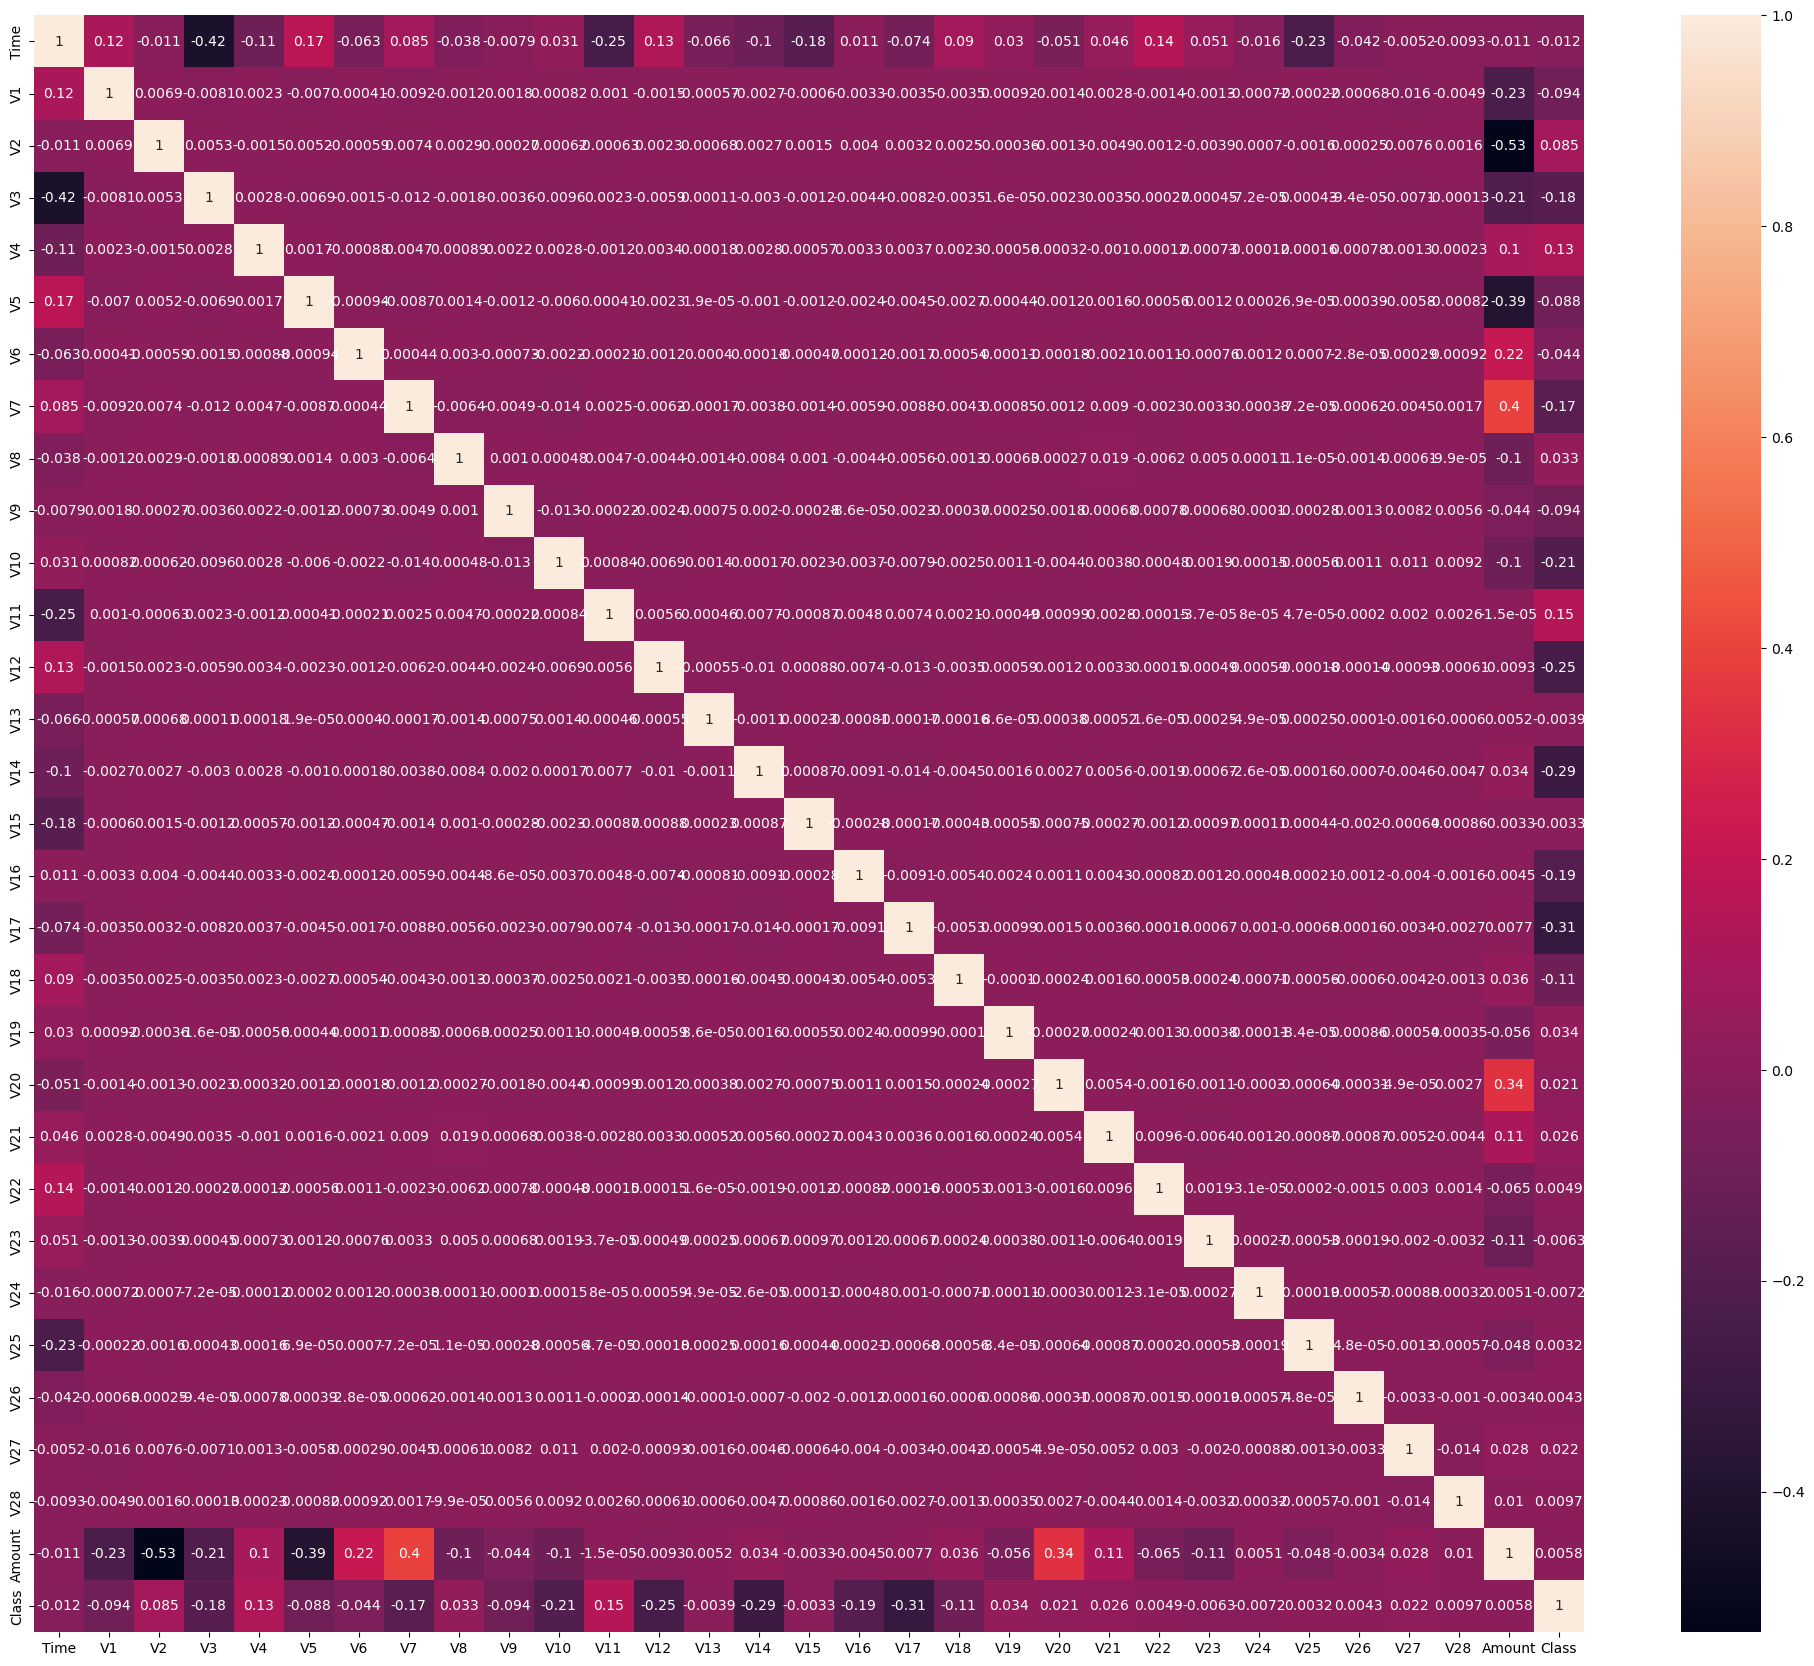

In [20]:
plt.figure(figsize=[25,21])
sns.heatmap(data=corr,annot=True)
plt.show()

#### 6.Plotting all the variable in displot to visualise the distribution

<Figure size 640x480 with 0 Axes>

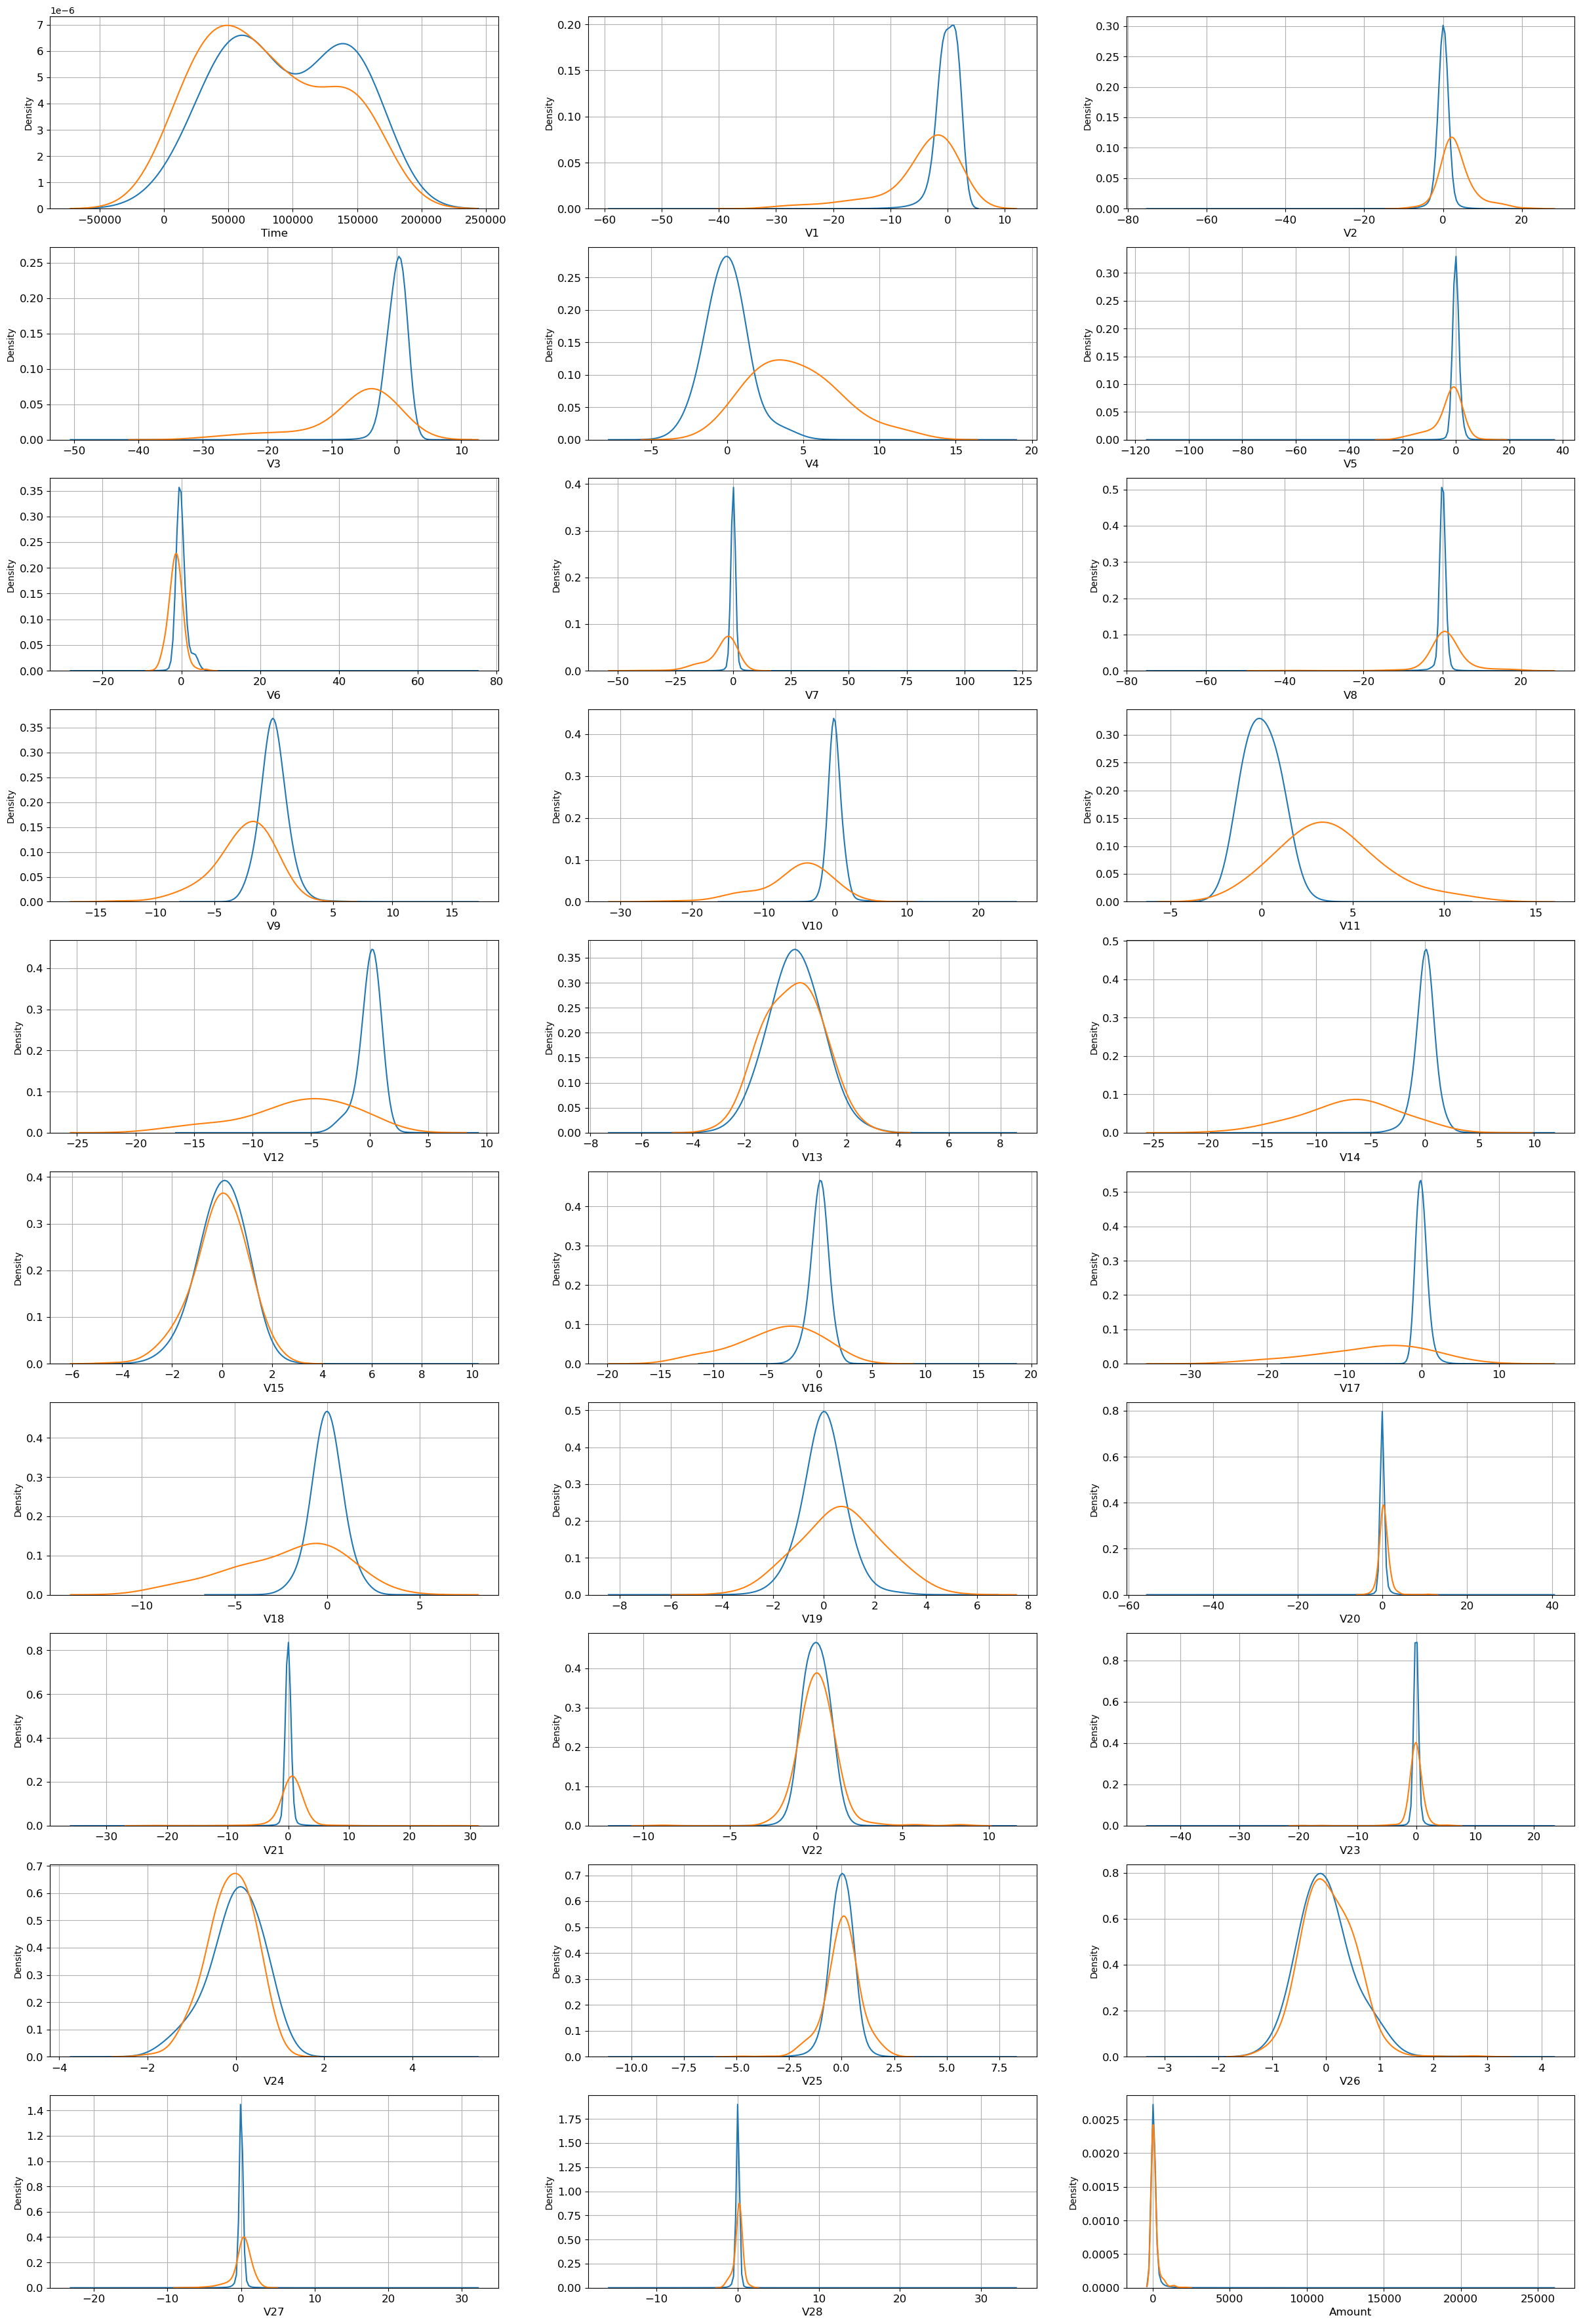

In [21]:
var = list(df.columns.values)
var.remove("Class") # dropping Class columns from the list

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

##### Observation
We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

#### 7. Droping Time column
We are droping the “Time” column as it is irrelevant and this feature is not going to help in the model building becouse the time in not gona make fraud transaction only the activity makes it, get into the core of banking.

In [22]:
df = df.drop("Time", axis = 1)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

#### 8.Visualizeing how the plots lay on V15 and V26 becouse we can see the relation on density of them in above graph

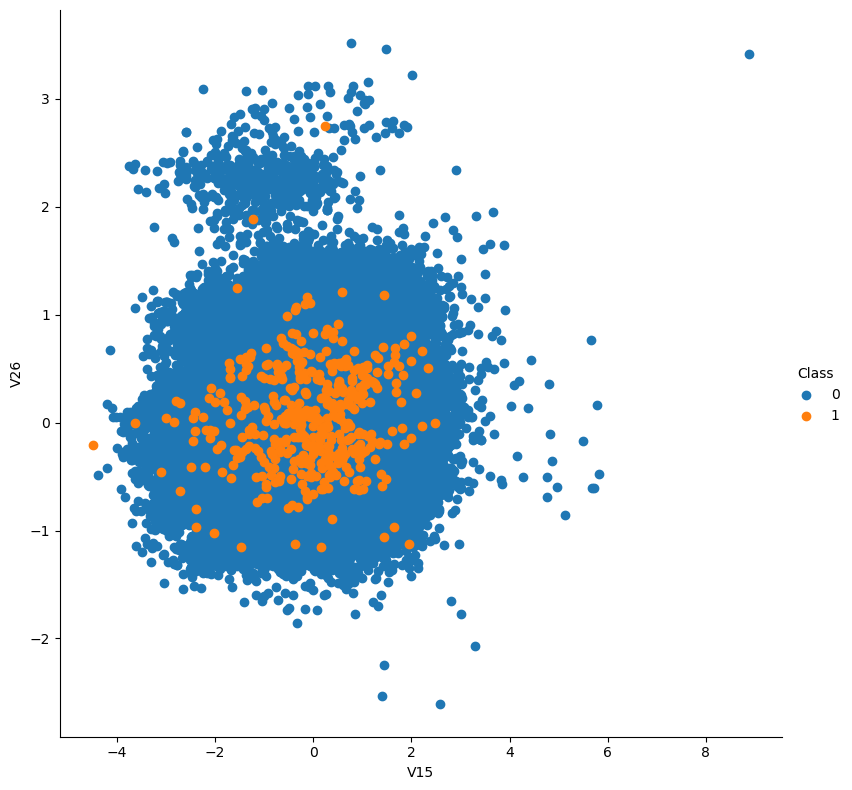

In [23]:
sns.FacetGrid(df,hue="Class",size=8).map(plt.scatter,"V15","V26").add_legend();
plt.show()

#### 9. Number of Fraudulent

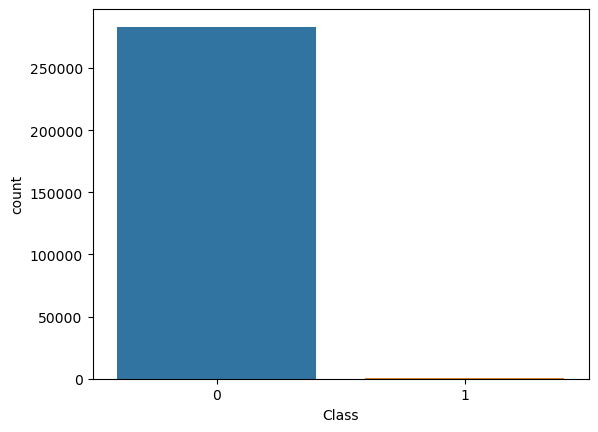

In [24]:
sns.countplot(data=df,x="Class")
plt.show()

In [25]:
print(df["Class"].value_counts())

0    283253
1       473
Name: Class, dtype: int64


## Predection With Anomaly Detection

#pip install pycaret

#pip install pycaret-ts-alpha

#pip install --pre pycaret

In [59]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

#### 1.Taking sample (Becouse it takes more time to solve the entire thing)

In [60]:
x=df.drop("Class",axis=1)
y=df.loc[:,("Class")]
print(x)
print(y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
283721 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
283722  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
283723   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
283724  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
283725  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [61]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x, y)

In [63]:
print(y_rus.value_counts())

0    473
1    473
Name: Class, dtype: int64


In [64]:
print(x_rus,y_rus)

           V1        V2        V3        V4        V5        V6        V7  \
0    1.260835 -1.366970  0.436133 -1.299812 -1.582653 -0.500260 -0.931225   
1    2.093841  0.140824 -2.152585  0.305117  0.660526 -0.919756  0.291110   
2    0.128523 -0.516833 -0.142250 -0.928846  0.527405 -0.707555  0.005645   
3    1.389670 -0.124098  0.420810 -0.338035 -0.809774 -1.012003 -0.614867   
4    1.159799 -0.485456  1.024078  0.452577 -0.830108  0.785622 -1.086470   
..        ...       ...       ...       ...       ...       ...       ...   
941 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
942  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
943 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
944 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
945  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

           V8        V9       V10  ...       V20       V21       V22  \
0  

#### 3.Importing pycaret

In [65]:
from pycaret.anomaly import *

In [66]:
data=x_rus

In [67]:
setup=setup(data)

In [90]:
iforest=create_model('iforest')

plot_model(iforest)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [68]:
knn=create_model('knn')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [69]:
knn_prediction=predict_model(knn, data=data)
print(knn_prediction)

In [71]:
print(knn_prediction["Anomaly"].value_counts())

0    906
1     40
Name: Anomaly, dtype: int64


In [72]:
ann_pred = knn_prediction["Anomaly"]

In [73]:
print(ann_pred)

0      0
1      0
2      0
3      0
4      0
      ..
941    0
942    0
943    0
944    0
945    0
Name: Anomaly, Length: 946, dtype: int32


In [74]:
ann_pred=np.array(ann_pred)
y1=np.array(y_rus)

In [75]:
ann_pred=pd.DataFrame(ann_pred)
print(ann_pred)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
941  0
942  0
943  0
944  0
945  0

[946 rows x 1 columns]


In [77]:
ann_pred=pd.DataFrame(ann_pred)
print(ann_pred.head())
y_test_ann=np.array(y1)
y_test_ann=pd.DataFrame(y1)
print(y_test_ann.head())

   0
0  0
1  0
2  0
3  0
4  0
   0
0  0
1  0
2  0
3  0
4  0


In [78]:
y_test_ann.columns=["Actual"]
ann_pred.columns=["Predection"]

In [79]:
ann_ps=pd.DataFrame()
ann_ps["pred"]=ann_pred.Predection

In [80]:
ann_ps["Actual"]=y_test_ann.Actual
print(ann_ps.head())

   pred  Actual
0     0       0
1     0       0
2     0       0
3     0       0
4     0       0


#### 2.Analysing the predected Cat boosting model

In [81]:
print(ann_ps["pred"].value_counts())

0    906
1     40
Name: pred, dtype: int64


In [82]:
print(ann_ps["Actual"].value_counts())

0    473
1    473
Name: Actual, dtype: int64


#### 3.Mean square error

In [83]:
Mean_Sq_Error1=((ann_ps["pred"])-(ann_ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_cbc=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for anomaly detection =",Mean_Sq_Error_cbc)

Mean_Sq_Error for anomaly detection = 449


#### 5.Confusion_Matrix

In [84]:
y_test_ann=ann_ps["Actual"]
y_pred_ann=ann_ps["pred"]

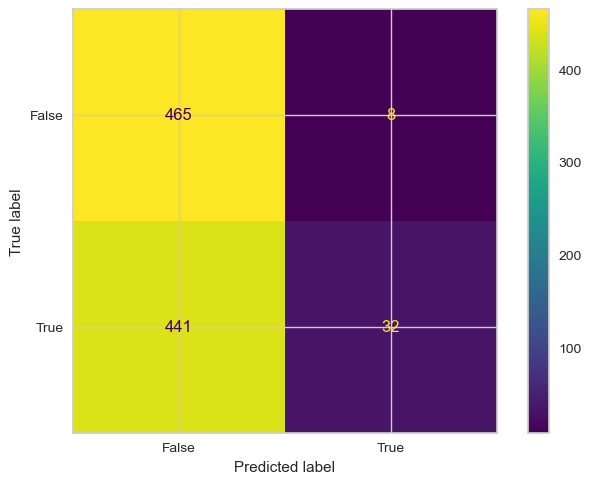

In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_ann,y_pred_ann):
    matrix = metrics.confusion_matrix(y_test_ann,y_pred_ann)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_ann,y_pred_ann)

In [86]:
 print(classification_report(y_test_ann,y_pred_ann))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       473
           1       0.80      0.07      0.12       473

    accuracy                           0.53       946
   macro avg       0.66      0.53      0.40       946
weighted avg       0.66      0.53      0.40       946



#### 6.Error Percentage

In [87]:
a=(ann_ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_cbc=(Mean_Sq_Error_cbc/(np.array(c))*100)
print("Error occured in anomaly dection =",Error_Percentage_cbc,"%")

Error occured in anomaly dection = [[47.46300211]] %


#### 7.Result Percentage

In [88]:
print("Result Percentage=",(100-Error_Percentage_cbc),"%")

Result Percentage= [[52.53699789]] %


#### 8.Conclusion
Well the results of Anomaly detection is not that great